<h2>Data Analysis and Machine Learning on Test Scores Dataset</h2>

<h3>Exploratory Data Analysis</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Splitting data 80/20 for final evaluation

In [2]:
test_scores = pd.read_csv('test_scores.csv')
test_scores = test_scores.sample(frac=1, random_state=0).reset_index(drop=True) # shuffling ordered data
data_train, data_test = train_test_split(test_scores,test_size=.2,random_state=0)
data = data_train # the set we'll explore
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
1018,VVTVA,Urban,Public,A93,Experimental,30.0,LBM49,Female,Qualifies for reduced/free lunch,35.0,49.0
634,KFZMY,Urban,Non-public,21Q,Standard,25.0,NS4LD,Female,Qualifies for reduced/free lunch,42.0,49.0
486,DNQDD,Suburban,Public,XXJ,Standard,27.0,8NGSI,Male,Qualifies for reduced/free lunch,65.0,68.0
1344,UKPGS,Suburban,Public,9AW,Standard,25.0,JSXAG,Female,Does not qualify,81.0,94.0
521,QOQTS,Urban,Public,X2O,Experimental,25.0,YS6D7,Male,Does not qualify,62.0,81.0


Some features have ambigous definitions, so let me explain them: <br>
n_student: number of students per classroom <br>
teaching_method: teaching method of classroom

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706 entries, 1018 to 1653
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1706 non-null   object 
 1   school_setting   1706 non-null   object 
 2   school_type      1706 non-null   object 
 3   classroom        1706 non-null   object 
 4   teaching_method  1706 non-null   object 
 5   n_student        1706 non-null   float64
 6   student_id       1706 non-null   object 
 7   gender           1706 non-null   object 
 8   lunch            1706 non-null   object 
 9   pretest          1706 non-null   float64
 10  posttest         1706 non-null   float64
dtypes: float64(3), object(8)
memory usage: 159.9+ KB


2133 samples, 11 features (1 target) and no missing data. 

In [4]:
data.describe()

,n_student,pretest,posttest
count,1706.000000,1706.000000,1706.000000
mean,22.794842,54.733294,66.917351
std,4.268015,13.593332,13.981541
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,55.000000,68.000000
75%,27.000000,64.750000,77.000000
max,31.000000,93.000000,100.000000


Students did better at posttest. 75% of students scored less than or equal to 64 at pretest and 77 at posttest. No one scored 100 at pretest, and...

In [5]:
data[data.posttest == 100].shape[0]

7

7 students scored 100 at posttest.

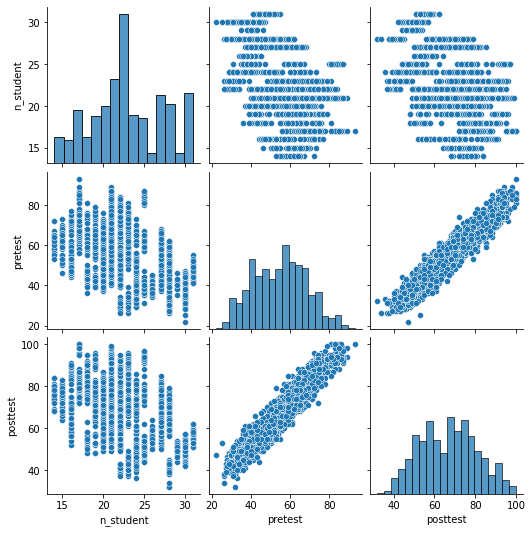

In [6]:
sns.pairplot(data)

pretest and posttest are highly correlated and n_student seem to have negative correlation with pretest & posttest.

([<matplotlib.patches.Wedge at 0x2b6ff99bc70>,
 [Text(-0.02430579362154559, 1.0997314346677678, ''),
  Text(0.02430579362154545, -1.0997314346677678, '')])

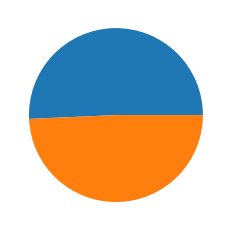

In [7]:
plt.pie(data.gender.value_counts())

Gender distribution is not skewed.

<h4>School</h4>

In [8]:
data.school.value_counts().shape[0]

23

Therea are 23 schools in total:

In [9]:
data.school[data.school_type == 'Public'].value_counts().shape[0]

15

In [10]:
data.school[data.school_type == 'Non-public'].value_counts().shape[0]

8

15 public and 8 non-public, and...

In [11]:
data.school[data.school_setting == 'Suburban'].value_counts().shape[0]

7

In [12]:
data.school[data.school_setting == 'Urban'].value_counts().shape[0]

9

In [13]:
data.school[data.school_setting == 'Rural'].value_counts().shape[0]

7

7 in suburban, 9 in urban, and 7 in rural.

Student population and gender distribution:

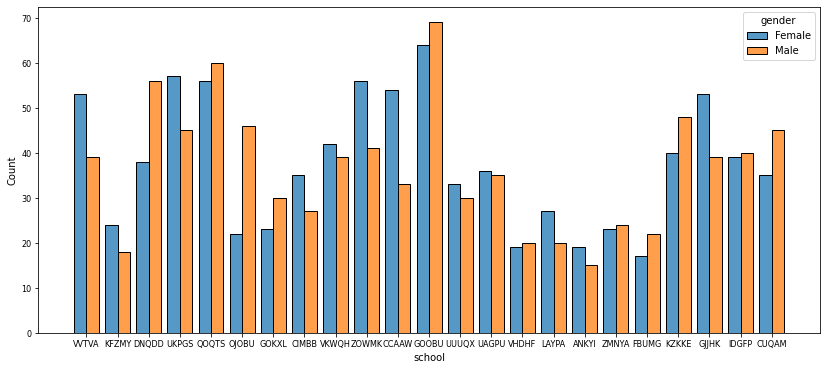

In [14]:
plt.subplots(figsize=(14, 6))
sns.histplot(data, x='school', hue="gender", multiple="dodge", shrink=.8).tick_params(labelsize=8.1)

Number of classrooms and average number of students per classroom in a school:

In [15]:
data[['school','classroom']].groupby(['school']).count()

,classroom
school,
ANKYI,34
CCAAW,87
CIMBB,62
CUQAM,80
DNQDD,94
FBUMG,39
GJJHK,92
GOKXL,53
GOOBU,133


In [16]:
data[['school','classroom','n_student']].groupby(['school'], as_index=False).mean()

,school,n_student
0,ANKYI,20.558824
1,CCAAW,18.528736
2,CIMBB,18.677419
3,CUQAM,26.862500
4,DNQDD,24.925532
5,FBUMG,15.435897
6,GJJHK,23.989130
7,GOKXL,21.509434
8,GOOBU,26.646617
9,IDGFP,18.949367


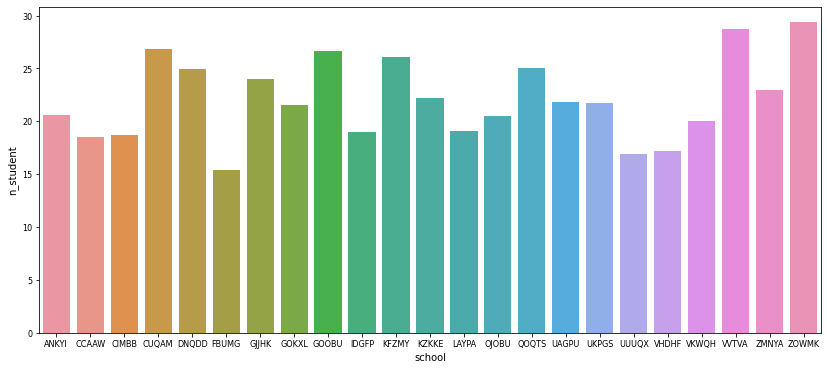

In [17]:
plt.subplots(figsize=(14, 6))
sns.barplot(data=data[['school','classroom','n_student']].groupby(['school'], as_index=False).mean(),
            x='school', y='n_student').tick_params(labelsize=8.1)

Pretest scores:

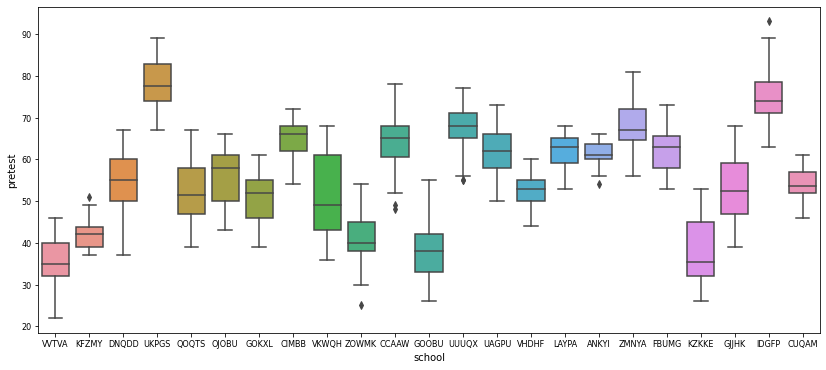

In [18]:
plt.subplots(figsize=(14, 6))
sns.boxplot(data=data, x='school', y='pretest').tick_params(labelsize=8.1)

UKPGS is the school with highest pretest average, and KZKKE with the lowest.

<h4>School setting</h4>

Student population and gender distribution:

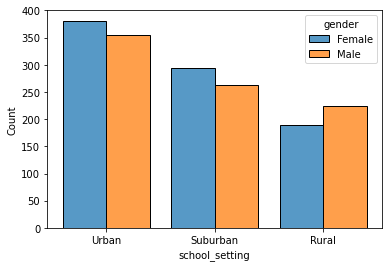

In [19]:
sns.histplot(data, x='school_setting', hue='gender', multiple='dodge', shrink=.8)

Pretest scores:

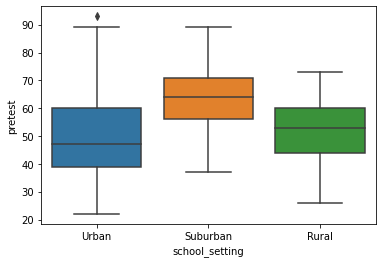

In [20]:
sns.boxplot(data=data, x='school_setting', y='pretest')

<h4>School type</h4>

Student population and gender distribution:

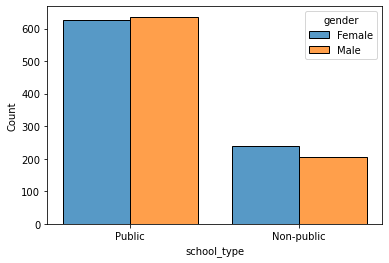

In [21]:
sns.histplot(data, x='school_type', hue='gender', multiple='dodge', shrink=.8)

Pretest scores:

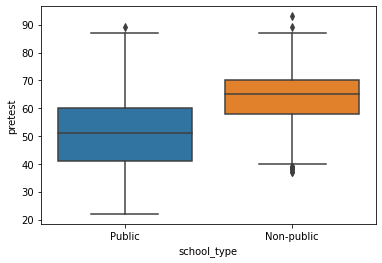

In [22]:
sns.boxplot(data=data, x='school_type', y='pretest')

School setting - school type:

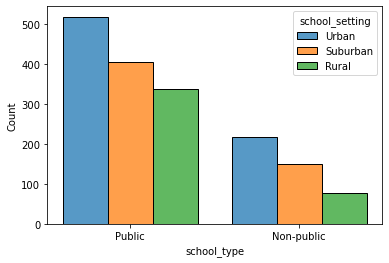

In [23]:
sns.histplot(data, x='school_type', hue='school_setting', multiple='dodge', shrink=.8)

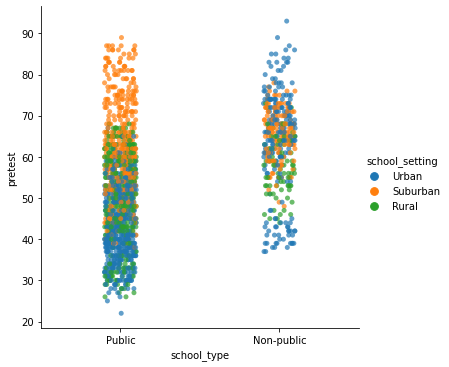

In [24]:
sns.catplot(data=data, x='school_type', y='pretest', hue='school_setting', alpha=0.7)

<h4>Teaching method</h4>

Student population and school setting: 

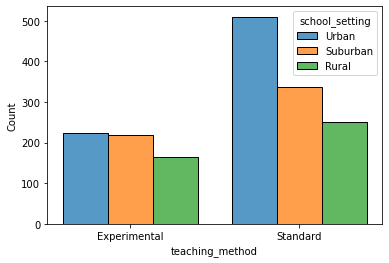

In [25]:
sns.histplot(data, x='teaching_method', hue='school_setting', multiple='dodge', shrink=.8)

Pretest scores:

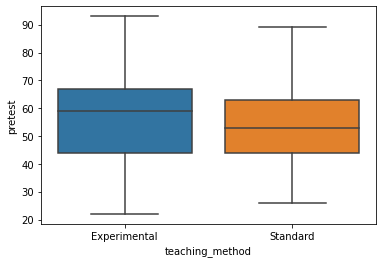

In [26]:
sns.boxplot(data=data, x='teaching_method', y='pretest')

<h4>Lunch</h4>

In [27]:
data.lunch.value_counts()

Does not qualify                    967
Qualifies for reduced/free lunch    739
Name: lunch, dtype: int64

Pretest scores (their correlation is -0.6):

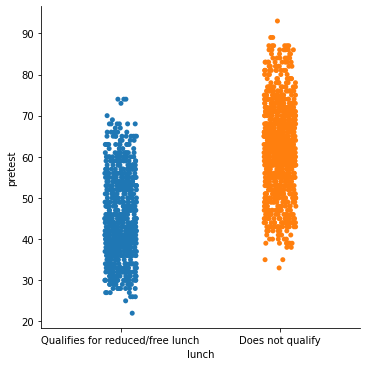

In [28]:
sns.catplot(data=data,x='lunch',y='pretest')

Lunch - school type:

In [29]:
data_public = data[data.school_type == 'Public']
data_public[data_public.lunch == 'Qualifies for reduced/free lunch'].shape[0] / data_public.shape[0]

0.48691514670896113

In [30]:
data_non_public = data[data.school_type == 'Non-public']
data_non_public[data_non_public.lunch == 'Qualifies for reduced/free lunch'].shape[0] / data_non_public.shape[0]

0.2808988764044944

In public schools, more students are qualified for reduced/free lunch. 

Lunch - school:

In [31]:
lunch_percentage = data.school[data.lunch == 'Qualifies for reduced/free lunch'].value_counts() / data.school.value_counts()
lunch_percentage.sort_values(ascending=True)

CIMBB    0.016129
UAGPU    0.028169
ANKYI    0.029412
QOQTS    0.051724
UUUQX    0.079365
ZMNYA    0.106383
VKWQH    0.111111
OJOBU    0.117647
CUQAM    0.125000
FBUMG    0.282051
CCAAW    0.471264
DNQDD    0.648936
KFZMY    0.785714
GOKXL    0.811321
VHDHF    0.846154
GJJHK    0.869565
GOOBU    0.917293
ZOWMK    0.927835
VVTVA    0.978261
KZKKE    1.000000
IDGFP         NaN
LAYPA         NaN
UKPGS         NaN
Name: school, dtype: float64

Every student in KZKKE qualifies for reduced/free lunch. In IDGFP, LAYPA and UKPGS, no one qualifies.

<h3>Feature Engineering & Preprocessing</h3>

school and classroom features contain large amount of categorical variables, we can handle them either by simply dummy coding or by bin-counting.

Bin-counting requires a statistic that is derivable from these features and that is informative of target variable.

In [32]:
data_bc = data.copy()
for student in range(data_bc.shape[0]):
    data_bc.iloc[student,0] = data_bc.pretest[data_bc.school == data_bc.iloc[student,0]].mean()
data_bc.school = data_bc.school.astype('float')

for student in range(data_bc.shape[0]):
    data_bc.iloc[student,3] = data_bc.pretest[data_bc.classroom == data_bc.iloc[student,3]].mean()
data_bc.classroom = data_bc.classroom.astype('float')

data_bc.drop('student_id',axis=1,inplace=True)
data_bc.rename(columns={'school':'school_pretest_mean','classroom':'classroom_pretest_mean'}, inplace=True)
data_bc

,school_pretest_mean,school_setting,school_type,classroom_pretest_mean,teaching_method,n_student,gender,lunch,pretest,posttest
1018,35.532609,Urban,Public,31.708333,Experimental,30.0,Female,Qualifies for reduced/free lunch,35.0,49.0
634,41.833333,Urban,Non-public,41.100000,Standard,25.0,Female,Qualifies for reduced/free lunch,42.0,49.0
486,54.117021,Suburban,Public,59.850000,Standard,27.0,Male,Qualifies for reduced/free lunch,65.0,68.0
1344,78.274510,Suburban,Public,83.666667,Standard,25.0,Female,Does not qualify,81.0,94.0
521,52.301724,Urban,Public,61.611111,Experimental,25.0,Male,Does not qualify,62.0,81.0
...,...,...,...,...,...,...,...,...,...,...
1033,64.000000,Rural,Non-public,64.000000,Experimental,14.0,Male,Does not qualify,64.0,84.0
1731,73.000000,Suburban,Public,73.000000,Experimental,23.0,Male,Does not qualify,73.0,91.0
763,59.000000,Rural,Public,59.000000,Standard,21.0,Female,Does not qualify,59.0,70.0
835,55.000000,Urban,Public,55.000000,Standard,28.0,Female,Does not qualify,55.0,70.0


In [33]:
data_bc.corr()['posttest']

school_pretest_mean       0.889770
classroom_pretest_mean    0.950663
n_student                -0.510815
pretest                   0.950628
posttest                  1.000000
Name: posttest, dtype: float64

In [34]:
test_bc = data.copy()
for student in range(test_bc.shape[0]):
    test_bc.iloc[student,0] = test_bc.pretest[test_bc.school == test_bc.iloc[student,0]].mean()
test_bc.school = test_bc.school.astype('float')

for student in range(test_bc.shape[0]):
    test_bc.iloc[student,3] = test_bc.pretest[test_bc.classroom == test_bc.iloc[student,3]].mean()
test_bc.classroom = test_bc.classroom.astype('float')

test_bc.drop('student_id',axis=1,inplace=True)

In [35]:
data_bc_dummy = pd.get_dummies(data_bc, columns=['school_setting','school_type','teaching_method','gender','lunch'], drop_first=True)
data_bc_dummy

,school_pretest_mean,classroom_pretest_mean,n_student,pretest,posttest,school_setting_Suburban,school_setting_Urban,school_type_Public,teaching_method_Standard,gender_Male,lunch_Qualifies for reduced/free lunch
1018,35.532609,31.708333,30.0,35.0,49.0,0,1,1,0,0,1
634,41.833333,41.100000,25.0,42.0,49.0,0,1,0,1,0,1
486,54.117021,59.850000,27.0,65.0,68.0,1,0,1,1,1,1
1344,78.274510,83.666667,25.0,81.0,94.0,1,0,1,1,0,0
521,52.301724,61.611111,25.0,62.0,81.0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1033,64.000000,64.000000,14.0,64.0,84.0,0,0,0,0,1,0
1731,73.000000,73.000000,23.0,73.0,91.0,1,0,1,0,1,0
763,59.000000,59.000000,21.0,59.0,70.0,0,0,1,1,0,0
835,55.000000,55.000000,28.0,55.0,70.0,0,1,1,1,0,0


In [36]:
test_bc_dummy = pd.get_dummies(test_bc, columns=['school_setting','school_type','teaching_method','gender','lunch'], drop_first=True)

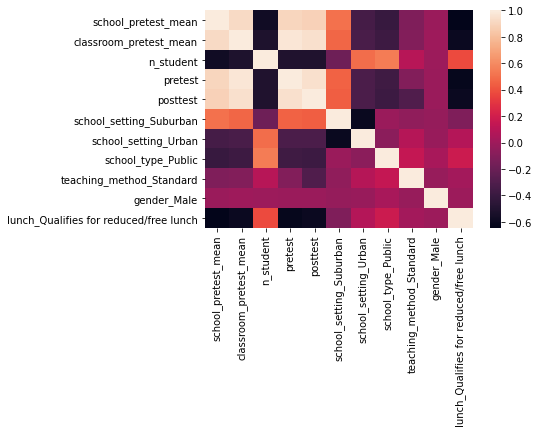

In [37]:
sns.heatmap(data_bc_dummy.corr())

<h3>Building models</h3>

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error

In [39]:
y_train = data_bc_dummy.posttest
X_train = data_bc_dummy.drop(['posttest'],axis=1)

In [40]:
y_test = test_bc_dummy.posttest
X_test = test_bc_dummy.drop(['posttest'],axis=1)

<h4>Linear models</h4>

In [41]:
pipeline_linear = Pipeline([('scaler',MinMaxScaler()),('linear_model',LinearRegression())])
param_grid_linear = [{'linear_model':[LinearRegression()],'scaler':[MinMaxScaler(),StandardScaler(),None]},
 {'linear_model':[Ridge()],'linear_model__alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100,300],
  'scaler':[MinMaxScaler(),StandardScaler(),None]},
 {'linear_model':[Lasso()],'linear_model__alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100,300],
  'scaler':[MinMaxScaler(),StandardScaler(),None]}]
grid_linear = GridSearchCV(pipeline_linear, param_grid_linear)
grid_linear.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('linear_model', LinearRegression())]),
             param_grid=[{'linear_model': [LinearRegression()],
                          'scaler': [MinMaxScaler(), StandardScaler(), None]},
                         {'linear_model': [Ridge()],
                          'linear_model__alpha': [0.001, 0.003, 0.01, 0.03, 0.1,
                                                  0.3, 1, 3, 10, 30, 100, 300],
                          'scaler': [MinMaxScaler(), StandardScaler(), None]},
                         {'linear_model': [Lasso(alpha=0.03)],
                          'linear_model__alpha': [0.001, 0.003, 0.01, 0.03, 0.1,
                                                  0.3, 1, 3, 10, 30, 100, 300],
                          'scaler': [MinMaxScaler(), StandardScaler(), None]}])

In [42]:
grid_linear.best_params_

{'linear_model': Lasso(alpha=0.03),
 'linear_model__alpha': 0.03,
 'scaler': StandardScaler()}

In [43]:
grid_linear.best_score_

0.9569779408313922

Final evaluation:

In [44]:
pred_linear = grid_linear.best_estimator_.predict(X_test)
mean_absolute_error(y_test, pred_linear)

2.2868522678519567

Feature selection done by L1 regularization:

In [45]:
weights = grid_linear.best_estimator_.named_steps['linear_model'].coef_
lasso_weights = pd.DataFrame({'feature':X_train.columns.to_list(),'weight':weights})
lasso_weights

,feature,weight
0,school_pretest_mean,0.094571
1,classroom_pretest_mean,6.895020
2,n_student,-0.071549
3,pretest,5.757549
4,school_setting_Suburban,0.000000
5,school_setting_Urban,-0.034655
6,school_type_Public,0.000000
7,teaching_method_Standard,-2.896405
8,gender_Male,-0.124055
9,lunch_Qualifies for reduced/free lunch,-0.511303


<h4>SVM</h4>

In [46]:
pipeline_svm = Pipeline([('scaler',MinMaxScaler()),('svm',SVR())])
param_grid_svm = {'scaler':[MinMaxScaler(),StandardScaler(),None],'svm__C':[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100,300],
                 'svm__gamma':[0.001,0.003,0.01,0.03,0.1,0.3,0,1,3,10,30,100,300]}
grid_svm = GridSearchCV(pipeline_svm, param_grid_svm)
grid_svm.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVR())]),
             param_grid={'scaler': [MinMaxScaler(), StandardScaler(), None],
                         'svm__C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3,
                                    10, 30, 100, 300],
                         'svm__gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0,
                                        1, 3, 10, 30, 100, 300]})

In [47]:
grid_svm.best_params_

{'scaler': StandardScaler(), 'svm__C': 300, 'svm__gamma': 0.001}

In [48]:
grid_svm.best_score_

0.9566122740399219

Final evaluation:

In [49]:
pred_svm = grid_svm.best_estimator_.predict(X_test)
mean_absolute_error(y_test, pred_svm)

2.2603650530273973

<h4>k-Nearest Neighbors</h4>

In [50]:
pipeline_knn = Pipeline([('scaler',MinMaxScaler()),('knn',KNeighborsRegressor())])
param_grid_knn = {'scaler':[MinMaxScaler(),StandardScaler(),None],
                  'knn__n_neighbors':[5,10,15,20,25,50,100]}
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn)
grid_knn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [5, 10, 15, 20, 25, 50, 100],
                         'scaler': [MinMaxScaler(), StandardScaler(), None]})

In [51]:
grid_knn.best_params_

{'knn__n_neighbors': 5, 'scaler': None}

In [52]:
grid_knn.best_score_

0.9419871254519387

Final evaluation:

In [53]:
pred_knn = grid_knn.best_estimator_.predict(X_test)
mean_absolute_error(y_test, pred_knn)

2.1025791324736227